<a href="https://colab.research.google.com/github/Jackson00Han/TimeSeries-Training/blob/main/TimeSeries_Datacamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AirPassengers.csv')
df['date'] = df['Month'].apply(lambda x: pd.to_datetime(x))
df['Passengers'] = df['#Passengers'].copy()
df.drop(['#Passengers','Month'], axis=1, inplace=True)
df['month'] = [i.month for i in df['date']]
df['year'] = [i.year for i in df['date']]
df['series'] = np.arange(1,len(df)+1)
df.drop('date', axis=1, inplace=True)

In [3]:
df.head()

,Passengers,month,year,series
0,112,1,1949,1
1,118,2,1949,2
2,132,3,1949,3
3,129,4,1949,4
4,121,5,1949,5


In [4]:
train = df[df['year'] < 1960]
test = df[1960<=df['year']]

In [5]:
train.shape, test.shape

((132, 4), (12, 4))

In [6]:
pip install pycaret

In [9]:
# import the regression module
from pycaret.regression import *

# initialize setup
s = setup(data = train,
          test_data = test,
          target = 'Passengers',
          fold_strategy = 'timeseries',
          numeric_features = ['year', 'series','month'],
          fold = 3, transform_target = True,
          session_id = 123,
          data_split_shuffle = False,  # Explicitly set to False
          fold_shuffle = False         # Explicitly set to False
         )

,Description,Value
0,Session id,123
1,Target,Passengers
2,Target type,Regression
3,Original data shape,"(144, 4)"
4,Transformed data shape,"(144, 4)"
5,Transformed train set shape,"(132, 4)"
6,Transformed test set shape,"(12, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [10]:
best = compare_models(sort = 'MAE')


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,44.3192,3050.6952,53.8852,-0.4522,0.1714,0.1521,0.0400
br,Bayesian Ridge,45.5643,3233.7133,55.6766,-0.6553,0.1765,0.1576,0.0467
ridge,Ridge Regression,45.7835,3257.2206,55.8542,-0.6687,0.1770,0.1585,0.0333
lar,Least Angle Regression,45.8053,3260.6009,55.8841,-0.6721,0.1771,0.1586,0.0400
lr,Linear Regression,45.9000,3267.4380,55.9554,-0.6772,0.1774,0.1590,2.1767
huber,Huber Regressor,46.0420,3308.9717,56.4600,-0.8186,0.1802,0.1618,0.0433
lasso,Lasso Regression,51.7106,3939.2790,61.4955,-1.4896,0.2374,0.1830,0.0400
llar,Lasso Least Angle Regression,51.7106,3939.2790,61.4955,-1.4896,0.2374,0.1830,0.0367
et,Extra Trees Regressor,52.2999,4642.7980,65.4347,-0.7793,0.2150,0.1593,0.1500
gbr,Gradient Boosting Regressor,52.4258,4348.1584,63.6830,-0.7181,0.2138,0.1616,0.0967


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

# Predition

In [12]:
future_dates = pd.date_range(start = '1961-01-01', end = '1965-01-01', freq = 'MS')
future_df = pd.DataFrame()
future_df['month'] = [i.month for i in future_dates]
future_df['year'] = [i.year for i in future_dates]
future_df['Series'] = np.arange(145,(145+len(future_dates)))
future_df.head()

,month,year,Series
0,1,1961,145
1,2,1961,146
2,3,1961,147
3,4,1961,148
4,5,1961,149


In [13]:
predictions_future = predict_model(best, data=future_df)
predictions_future.head()


KeyError: "['date', 'series'] not in index"

In [12]:
concat_df = pd.concat([data,predictions_future], axis=0)
concat_df_i = pd.date_range(start='1949-01-01', end = '1965-01-01', freq = 'MS')
concat_df.set_index(concat_df_i, inplace=True)

In [13]:
concat_df

,Passenger,month,year,prediction_label
1949-01-01,112.0,1,1949,NaN
1949-02-01,118.0,2,1949,NaN
1949-03-01,132.0,3,1949,NaN
1949-04-01,129.0,4,1949,NaN
1949-05-01,121.0,5,1949,NaN
...,...,...,...,...
1964-09-01,NaN,9,1964,776.702329
1964-10-01,NaN,10,1964,781.456996
1964-11-01,NaN,11,1964,786.237054
1964-12-01,NaN,12,1964,791.042619


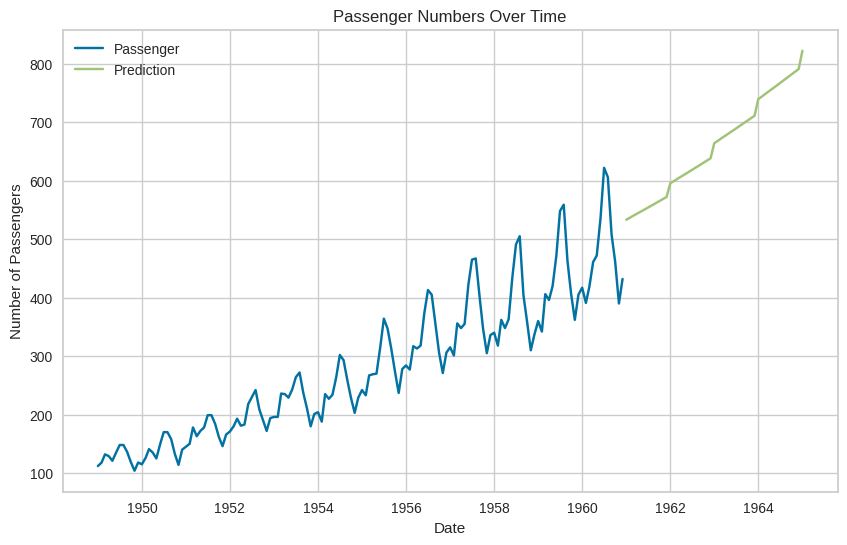

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(concat_df.index, concat_df['Passenger'], label='Passenger')  # Plot 'Passenger' vs index
plt.plot(concat_df.index, concat_df['prediction_label'], label='Prediction')  # Plot 'prediction_label' vs index
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Passenger Numbers Over Time')
plt.grid(True)
plt.legend() # Add a legend
plt.show()